```
Sensor locations
str_134     SW SS I 6
disp_204    SE SS E 1
tmp_215     SE SS I 2
trf_count   -
str_166     SE MS I 1
tmp_269     NE SS O 1
```

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

c_orange_d = '#FF5722'
c_orange = '#FF9800'
c_red = '#D32F2F'
c_green_d = '#388E3C'
c_green = '#4CAF50'
c_blue_d = '#303F9F'
c_blue_l = '#2196F3'
c_teal_d = '#00796B'
c_purple = '#9C27B0'
c_purple_d = '#512DA8'
c_yellow_d = '#FFA000'
c_yellow = '#FFC107'
c_grey = '#607D8B'
c_grey_d = '#455A64'

In [2]:
df = pd.read_hdf('elite_sen_4.h5', 'table')

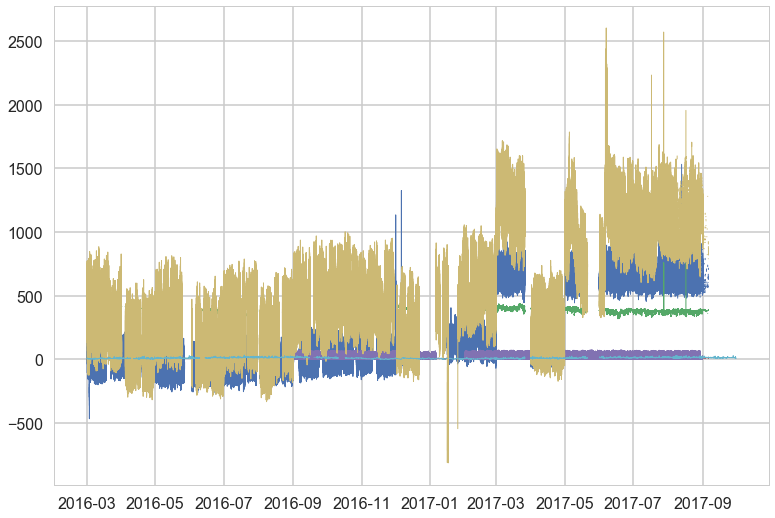

In [3]:
plt.plot(df, linewidth=1)

In [4]:
d = df.loc['2017-04-01':'2017-04-27'] #.drop(['str_229', 'pressure_2753'], axis=1)

In [13]:
sns.set_style('white')
import matplotlib.dates as mdates

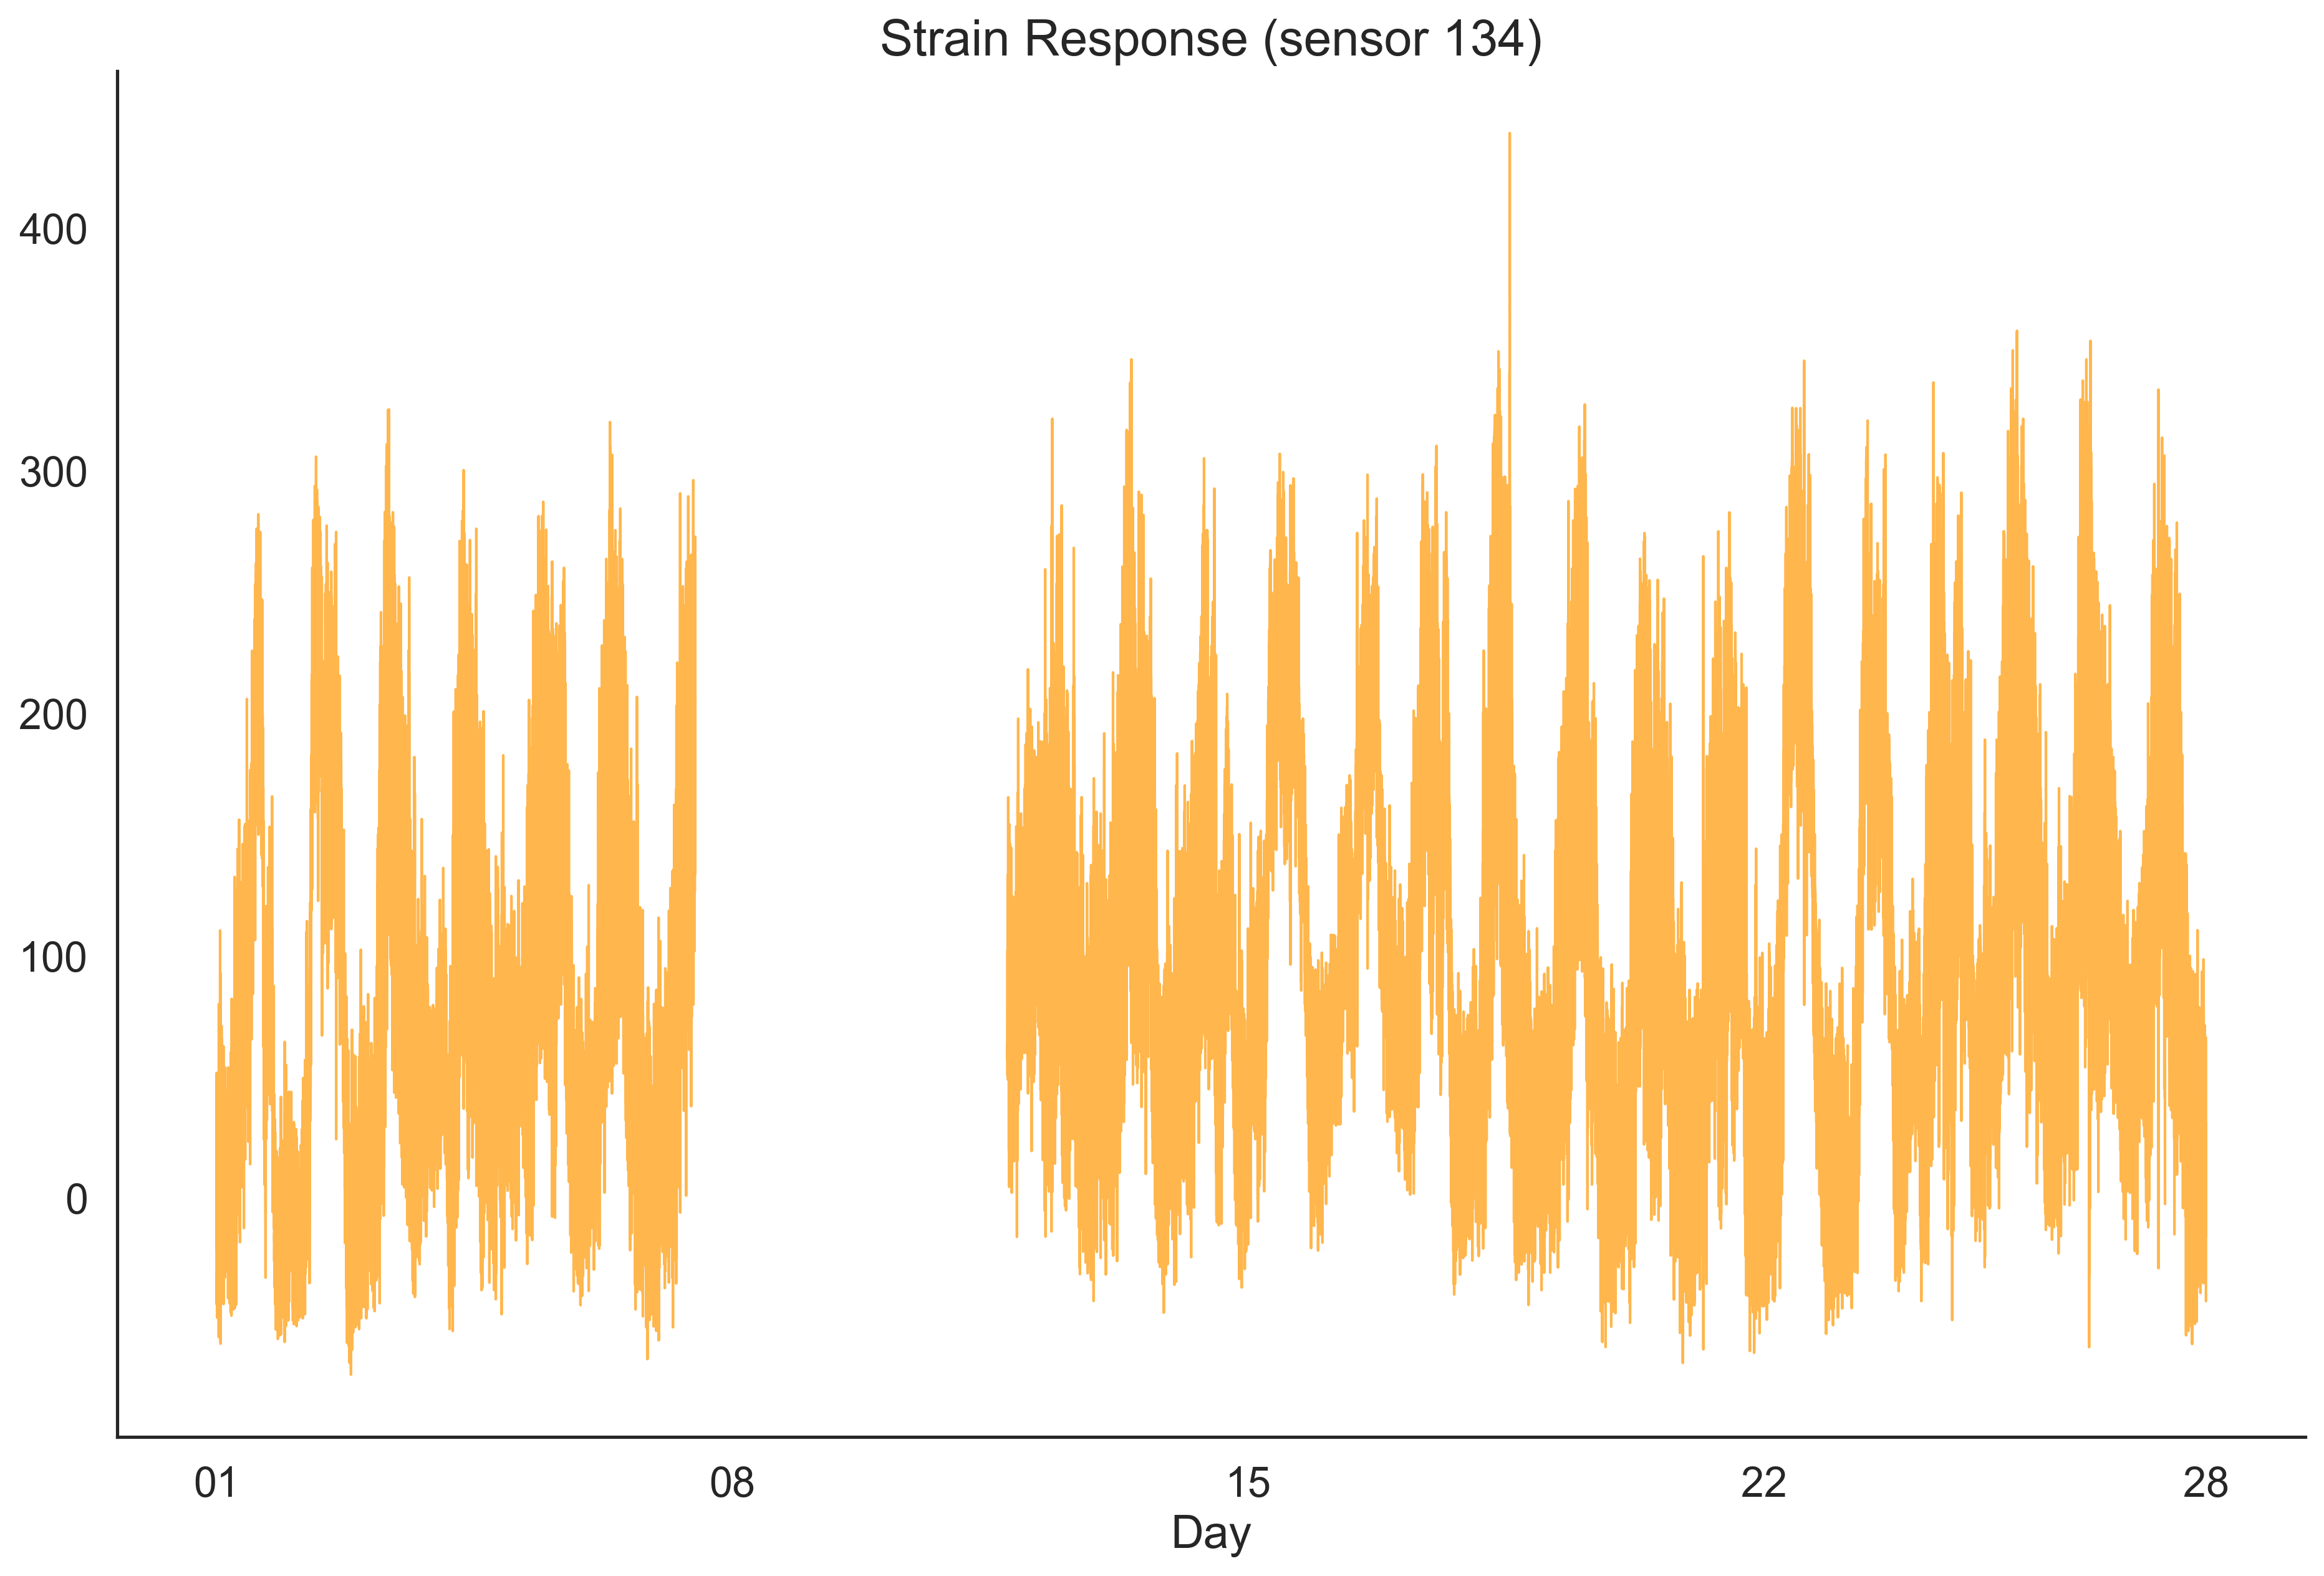

In [42]:
fig, ax = plt.subplots(dpi=300)

plt.plot(d['str_134'], linewidth=1, alpha=0.7, color=c_orange)
plt.title('Strain Response (sensor 134)')
plt.xlabel('Day')
plt.tight_layout()

xlocator = mdates.DayLocator(bymonthday=[1, 8, 15, 22, 28], interval=1)
xformatter = mdates.DateFormatter('%d')
ax.xaxis.set_major_locator(xlocator)
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
sns.despine(offset=0)
plt.tight_layout()
plt.savefig('ml-str134.png')

In [44]:
len(d)

77760

In [45]:
d.head()

,str_134,disp_204,tmp_215,trf_count,str_166,tmp_269
timestamp,,,,,,
2017-04-01 00:00:00,-31.094607,399.543553,10.202032,5.0,4.776820,10.010247
2017-04-01 00:00:30,-43.574587,400.091947,10.199054,2.0,64.930917,10.011773
2017-04-01 00:01:00,51.771963,397.551543,10.201654,13.0,136.229263,10.012311
2017-04-01 00:01:30,23.495473,398.564520,10.199120,5.0,117.809783,10.009575
2017-04-01 00:02:00,7.051277,398.820880,10.195561,8.0,119.363307,10.007039


In [49]:
for col in d.columns:
    print("{} -- amount of data: {}".format(col, len(d[col])))
    print("{} -- amount of missing data: {}".format(col, d[col].isnull().sum()))
    print("{} -- percentage of missing data: {:.2f} %".format(col, d[col].isnull().sum() * 100 / len(d[col])))
    print("")

str_134 -- amount of data: 77760
str_134 -- amount of missing data: 12215
str_134 -- percentage of missing data: 15.71 %

disp_204 -- amount of data: 77760
disp_204 -- amount of missing data: 41
disp_204 -- percentage of missing data: 0.05 %

tmp_215 -- amount of data: 77760
tmp_215 -- amount of missing data: 41
tmp_215 -- percentage of missing data: 0.05 %

trf_count -- amount of data: 77760
trf_count -- amount of missing data: 0
trf_count -- percentage of missing data: 0.00 %

str_166 -- amount of data: 77760
str_166 -- amount of missing data: 41
str_166 -- percentage of missing data: 0.05 %

tmp_269 -- amount of data: 77760
tmp_269 -- amount of missing data: 3206
tmp_269 -- percentage of missing data: 4.12 %



In [46]:
import matplotlib.dates as mdates

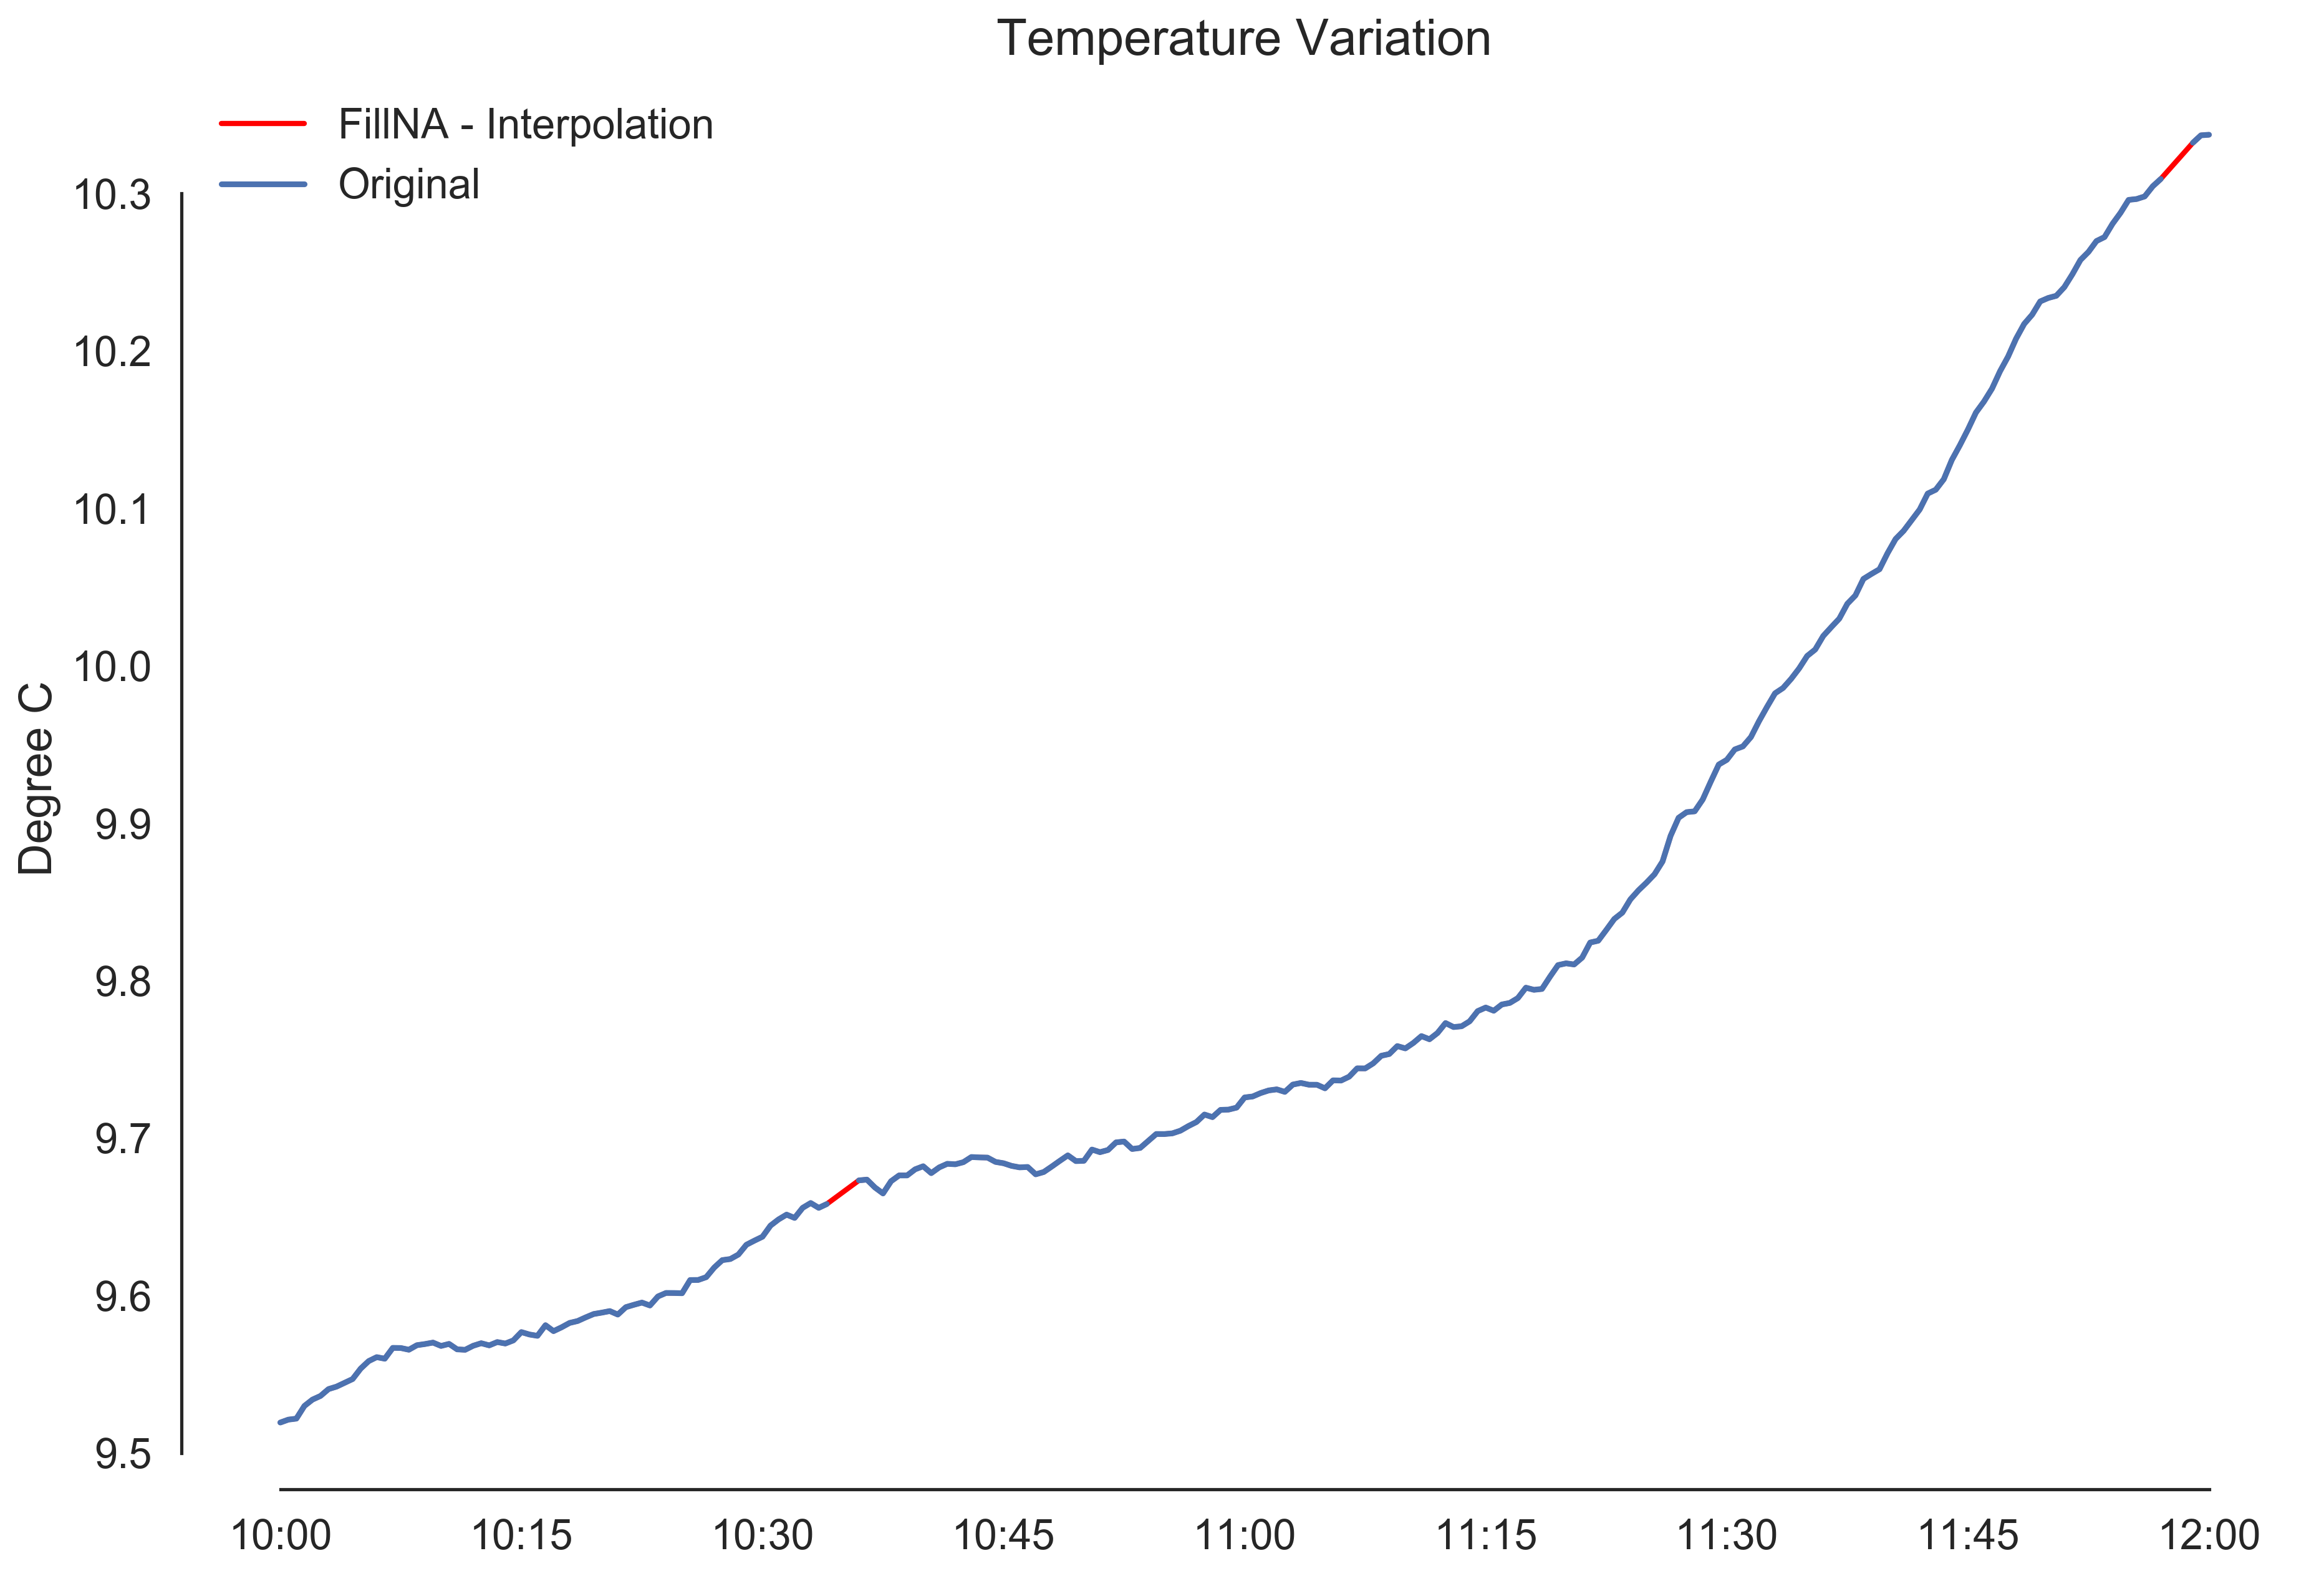

In [47]:
sns.set_style('white')

fig, ax = plt.subplots(dpi=300)

plt.title('Temperature Variation')
plt.plot(d['tmp_215'].loc['2017-04-07 10:00:00':'2017-04-07 12:00:00'].interpolate(), linewidth=2, color='r', label='FillNA - Interpolation')
plt.plot(d['tmp_215'].loc['2017-04-07 10:00:00':'2017-04-07 12:00:00'], linewidth=2.2, label='Original')
plt.ylabel('Degree C')
plt.legend()
xlocator = mdates.MinuteLocator(byminute=[0,15,30,45], interval = 1)
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# Fmt = mdates.DateFormatter("%y-%m")
ax.xaxis.set_major_locator(xlocator)
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
sns.despine(offset=1, trim=True)
plt.tight_layout()
plt.savefig('tmp-var-fillna-hour.png')

FillNA by interpolation for disp_204 tmp_215 str_166 tmp_269

In [50]:
d.corr()

,str_134,disp_204,tmp_215,trf_count,str_166,tmp_269
str_134,1.000000,-0.296866,0.046194,0.502531,0.489539,0.250799
disp_204,-0.296866,1.000000,-0.935642,-0.564338,-0.752154,-0.820287
tmp_215,0.046194,-0.935642,1.000000,0.415335,0.623130,0.803029
trf_count,0.502531,-0.564338,0.415335,1.000000,0.644395,0.456673
str_166,0.489539,-0.752154,0.623130,0.644395,1.000000,0.593297
tmp_269,0.250799,-0.820287,0.803029,0.456673,0.593297,1.000000


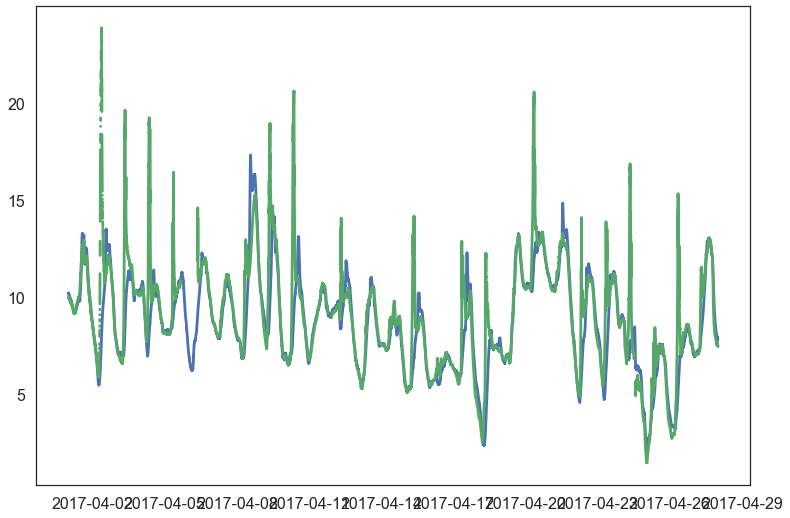

In [48]:
plt.plot(d['tmp_215'])
plt.plot(d['tmp_269'])

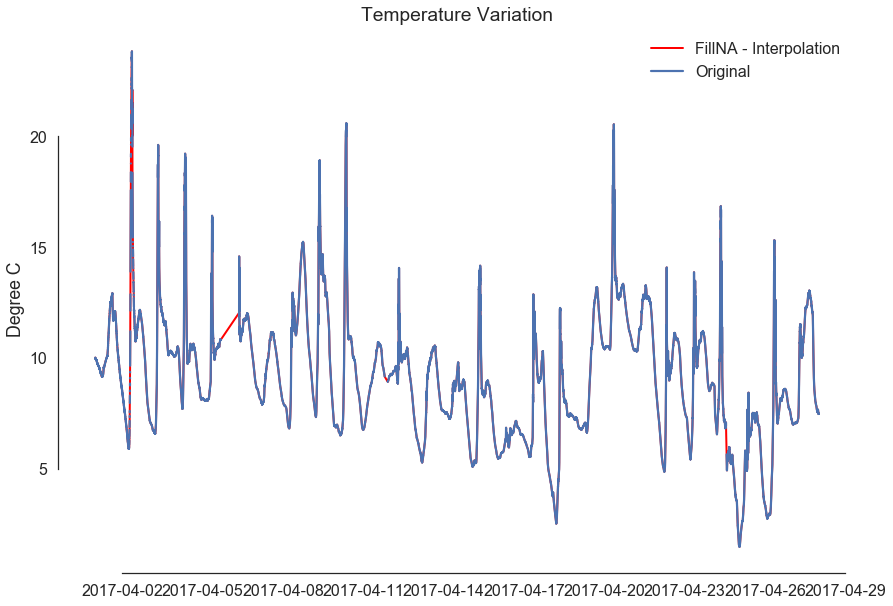

In [74]:
fig, ax = plt.subplots()

plt.title('Temperature Variation')
plt.plot(d['tmp_269'].interpolate(), linewidth=2, color='r', label='FillNA - Interpolation')
plt.plot(d['tmp_269'], linewidth=2.2, label='Original')
plt.ylabel('Degree C')
plt.legend()
# xlocator = mdates.MinuteLocator(byminute=[0,15,30,45], interval = 1)
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# Fmt = mdates.DateFormatter("%y-%m")
# ax.xaxis.set_major_locator(xlocator)
# xformatter = mdates.DateFormatter('%H:%M')
# plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
sns.despine(offset=1, trim=True)
plt.tight_layout()
# plt.savefig('tmp-var-fillna-hour.png')

## Apply interpolation fillna

In [137]:
d['disp_204'] = d['disp_204'].interpolate()
d['tmp_215'] = d['tmp_215'].interpolate()
d['str_166'] = d['str_166'].interpolate()
d['tmp_269'] = d['tmp_269'].interpolate()

C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [76]:
for col in d.columns:
    print("{} -- amount of data: {}".format(col, len(d[col])))
    print("{} -- amount of missing data: {}".format(col, d[col].isnull().sum()))
    print("{} -- percentage of missing data: {:.2f} %".format(col, d[col].isnull().sum() * 100 / len(d[col])))
    print("")

str_134 -- amount of data: 77760
str_134 -- amount of missing data: 12215
str_134 -- percentage of missing data: 15.71 %

disp_204 -- amount of data: 77760
disp_204 -- amount of missing data: 0
disp_204 -- percentage of missing data: 0.00 %

tmp_215 -- amount of data: 77760
tmp_215 -- amount of missing data: 0
tmp_215 -- percentage of missing data: 0.00 %

trf_count -- amount of data: 77760
trf_count -- amount of missing data: 0
trf_count -- percentage of missing data: 0.00 %

str_166 -- amount of data: 77760
str_166 -- amount of missing data: 0
str_166 -- percentage of missing data: 0.00 %

tmp_269 -- amount of data: 77760
tmp_269 -- amount of missing data: 0
tmp_269 -- percentage of missing data: 0.00 %



Now train model 

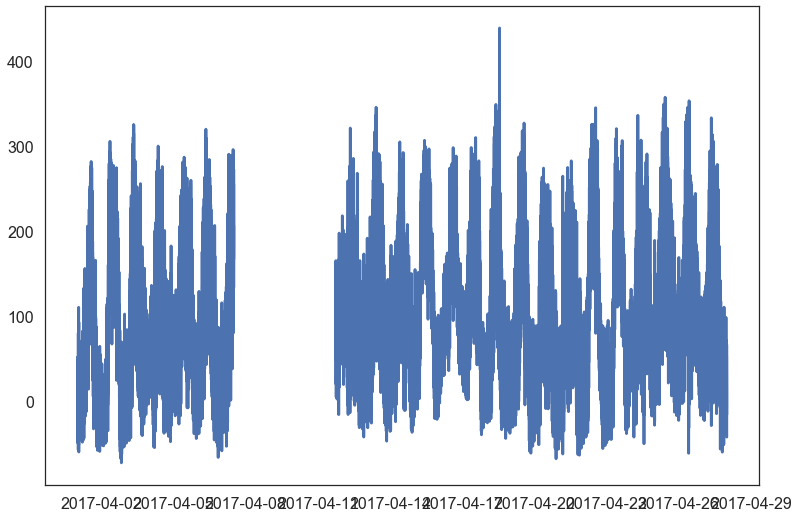

In [79]:
plt.plot(d['str_134'])

In [51]:
trainset = d.dropna()
final = d[d['str_134'].isnull()]

In [52]:
len(d), len(trainset), len(final)

(77760, 62328, 12215)

In [140]:
X = trainset.drop('str_134', axis=1)
y = trainset['str_134']

X_final = final.drop('str_134', axis=1)
# y = final['str_134']

In [54]:
X_train = trainset.loc[:'2017-04-27'].drop('str_134', axis=1)
y_train = trainset.loc[:'2017-04-27']['str_134']

X_test = trainset.loc['2017-04-27':].drop('str_134', axis=1)
y_test = trainset.loc['2017-04-27':]['str_134']

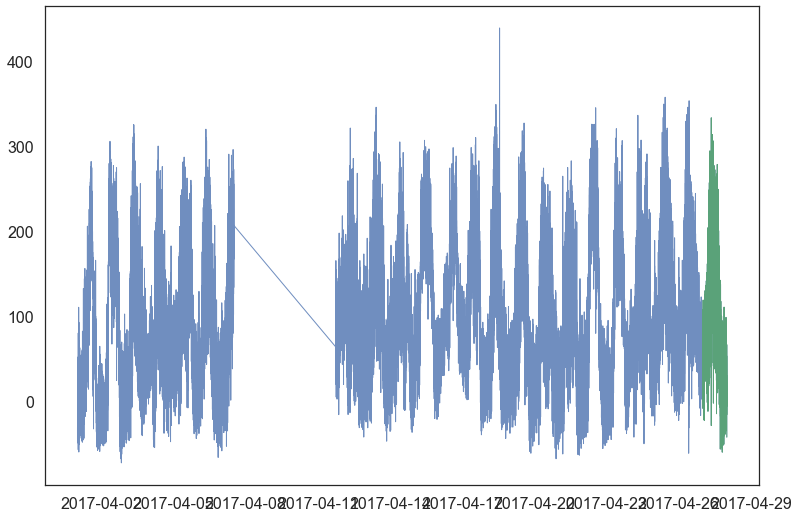

In [94]:
plt.plot(y_train, linewidth=1, alpha=0.8)
plt.plot(y_test, linewidth=1, alpha=0.8)

In [90]:
print('train/test ratio: {:.3f}'.format(len(y_train) / len(y_test)))

train/test ratio: 22.759


In [55]:
X_train = trainset.loc[:'2017-04-27'].drop('str_134', axis=1).values
y_train = trainset.loc[:'2017-04-27']['str_134'].values

X_test = trainset.loc['2017-04-27':].drop('str_134', axis=1).values
y_test = trainset.loc['2017-04-27':]['str_134'].values

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
# assess accuracy

def accuracy(y, y_pred):
    print('MSE {:.4f}'.format(mean_squared_error(y, y_pred)))
    print('R2 {:.4f}'.format(r2_score(y, y_pred)))
    plt.plot(y, linewidth=1, alpha=0.7)
    plt.plot(y_pred, linewidth=1, alpha=0.7)

MSE 215.7263
R2 0.9584


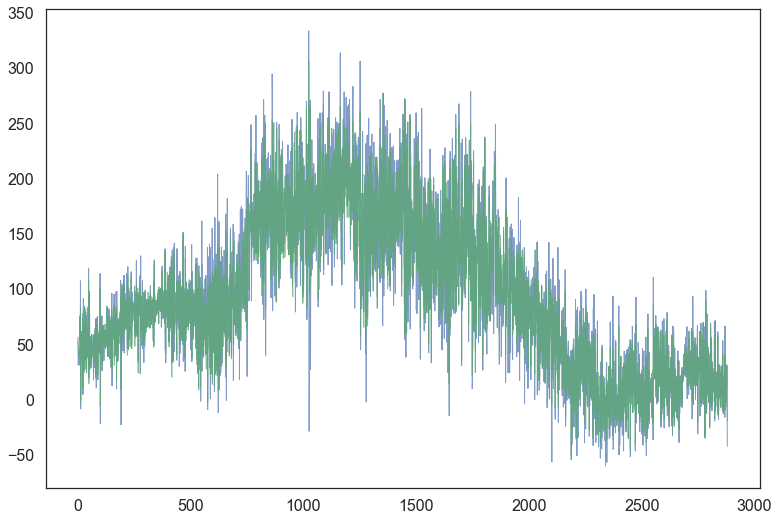

In [58]:
tree = RandomForestRegressor().fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy(y_test, y_pred)

In [60]:
feature = d.drop('str_134', axis=1).columns

In [61]:
tree.feature_importances_

array([ 0.17924785,  0.18972325,  0.31919052,  0.09585456,  0.21598382])

In [73]:
importances = pd.DataFrame(tree.feature_importances_, index=feature, columns=['importance']).sort_values(by='importance', ascending=False)

In [74]:
importances.head()

,importance
trf_count,0.319191
tmp_269,0.215984
tmp_215,0.189723
disp_204,0.179248
str_166,0.095855


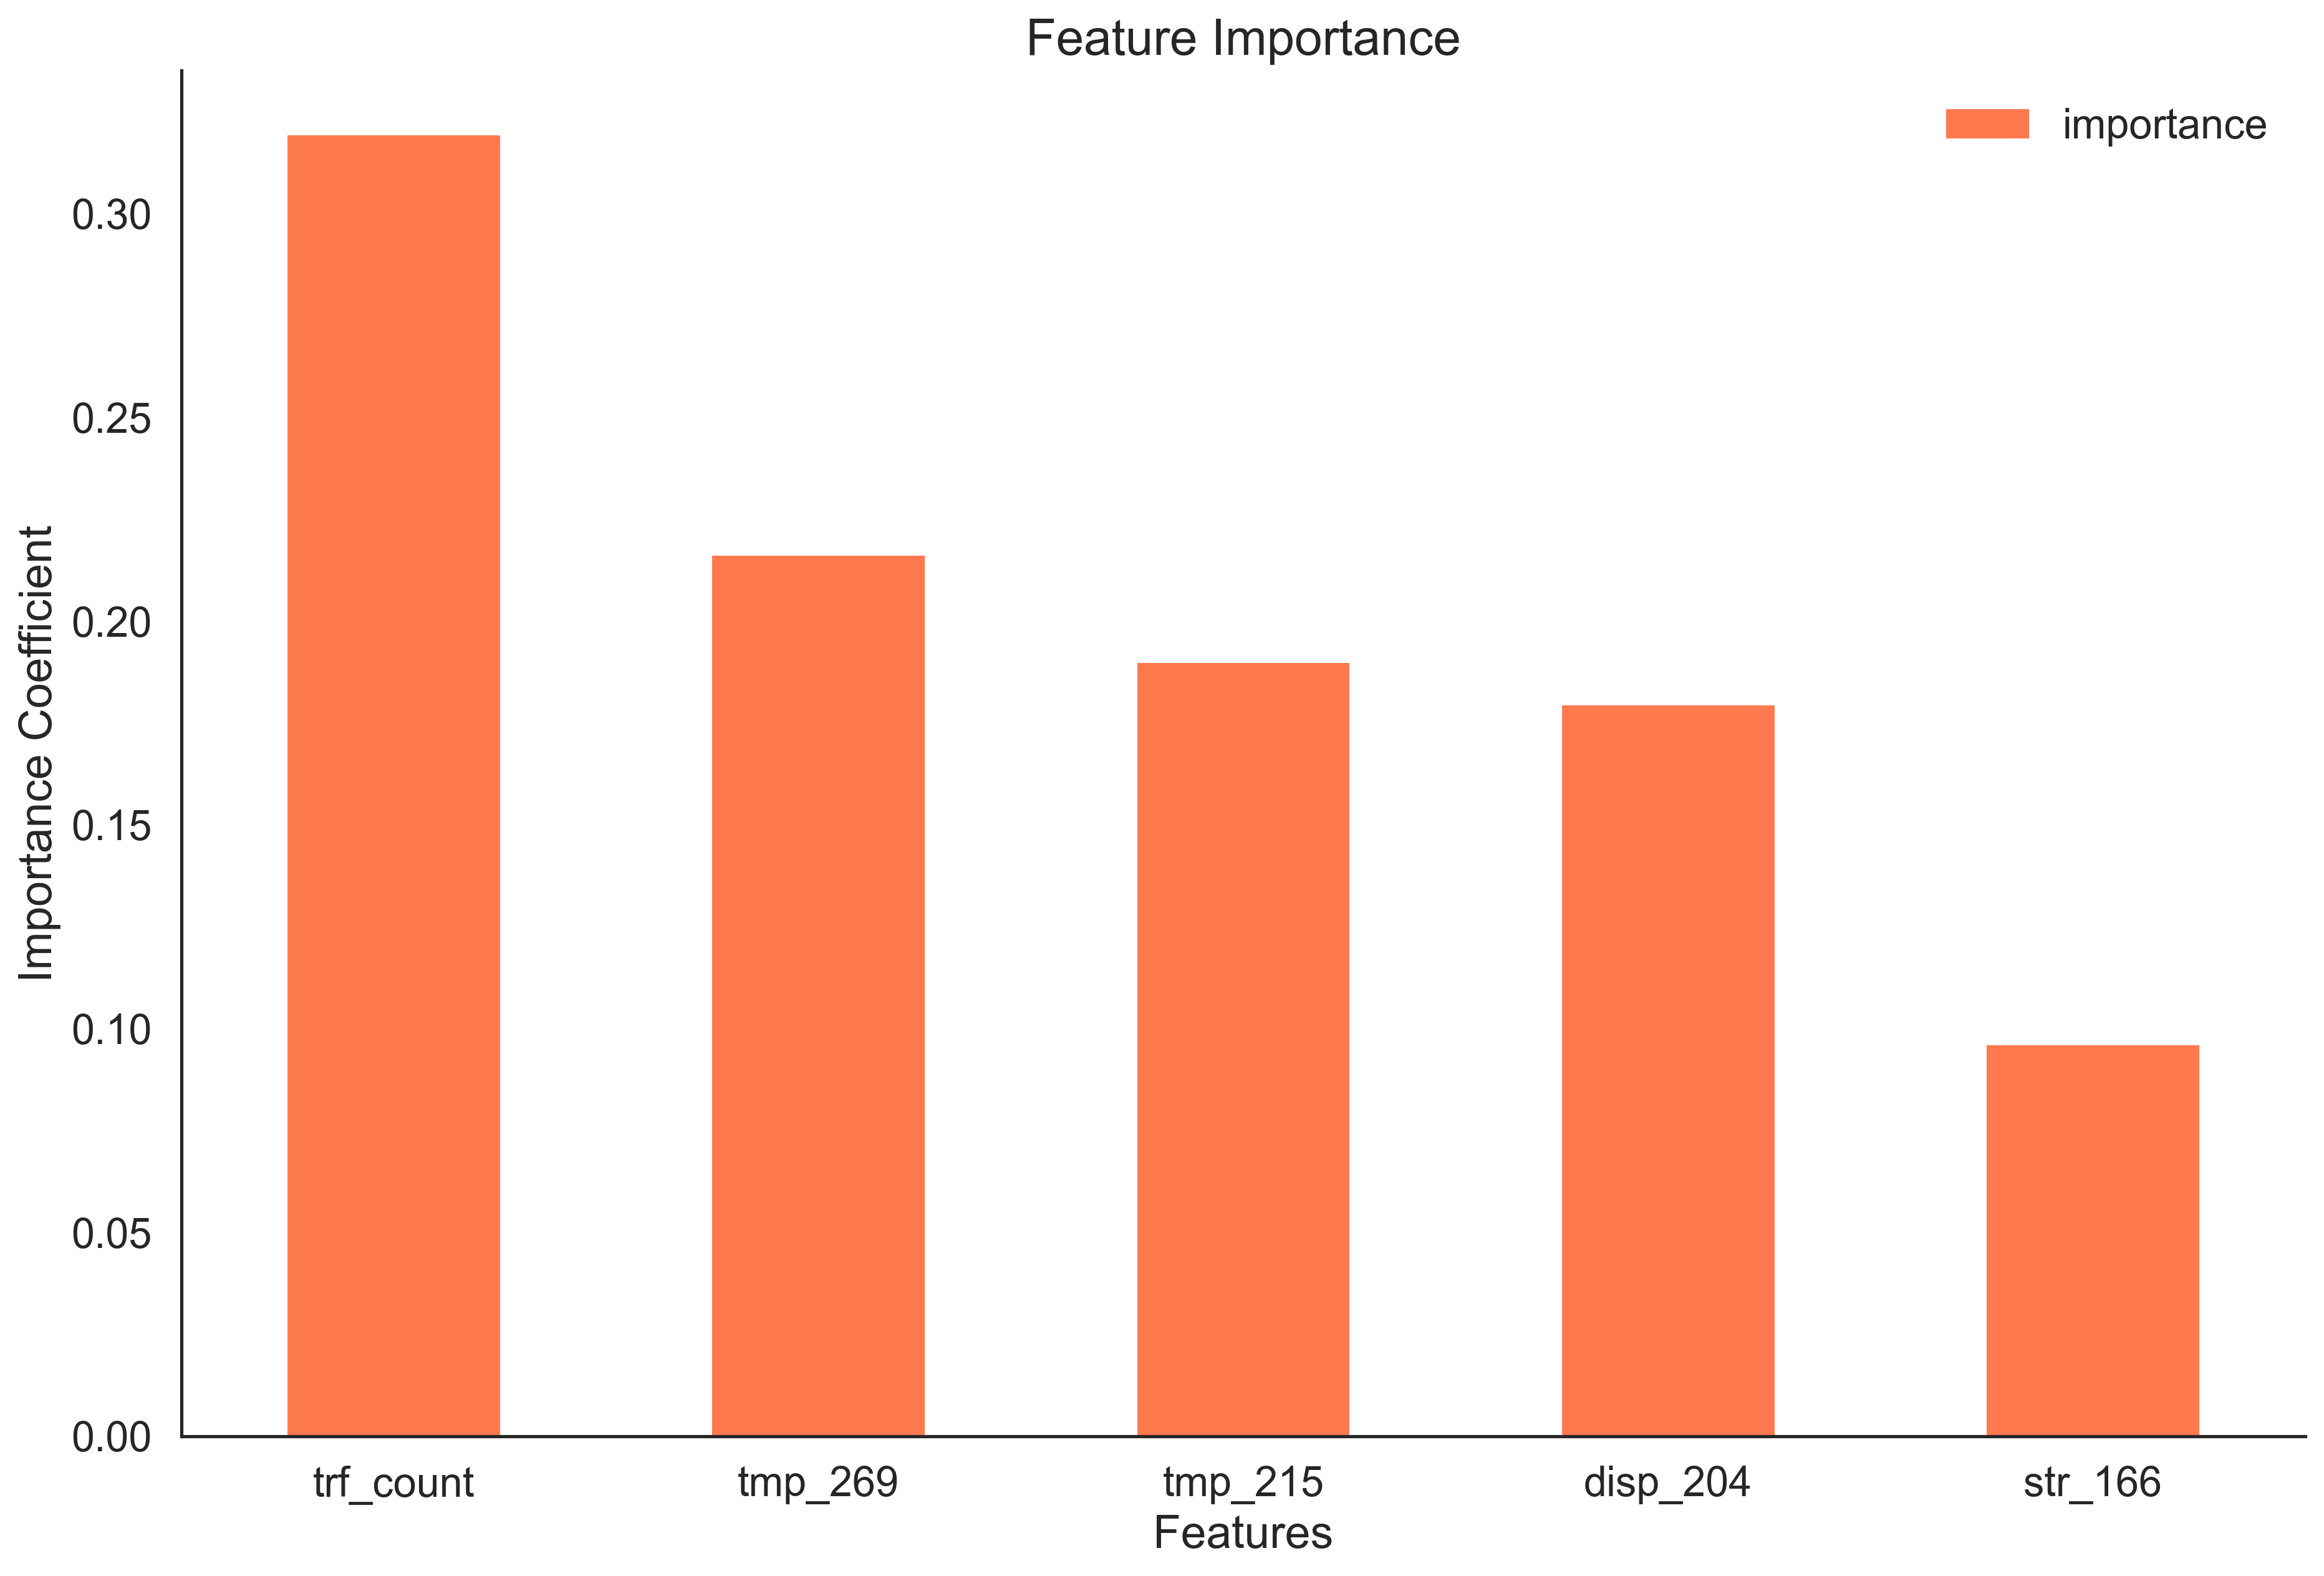

In [88]:
fig, ax = plt.subplots(dpi=300)

importances.plot(kind='bar', ax=ax, color=c_orange_d, alpha=0.8)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Coefficient')
plt.legend()
sns.despine(offset=0)
plt.tight_layout()
plt.savefig('feature-importance.png')

Apply to final data set -- production

## Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn.metrics import r2_score

n_estimator: 1 Accuracy: 0.834
n_estimator: 2 Accuracy: 0.901
n_estimator: 4 Accuracy: 0.937
n_estimator: 8 Accuracy: 0.956
n_estimator: 16 Accuracy: 0.964
n_estimator: 24 Accuracy: 0.966
n_estimator: 32 Accuracy: 0.969


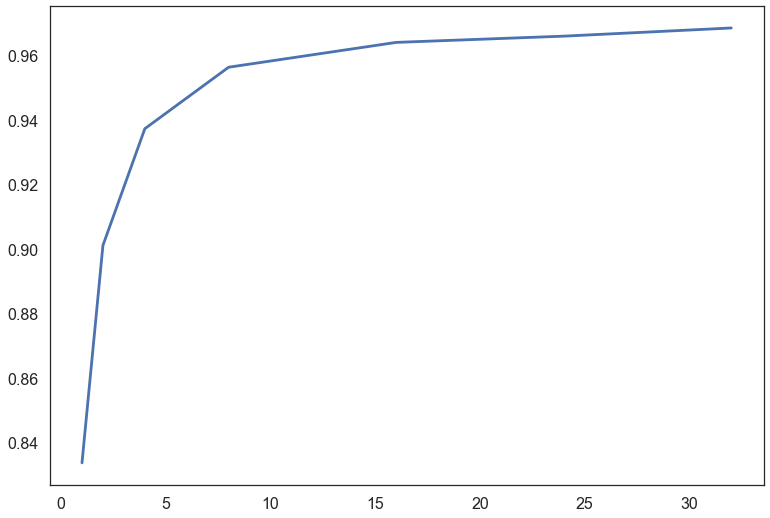

In [106]:
n_estimators = [1, 2, 4, 8, 16, 24, 32]
acc = []

for n in n_estimators:
    tree = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = r2_score(y_test, y_pred)
    print("n_estimator: {} Accuracy: {:.3f}".format(n, score))
    acc.append(score)

plt.plot(n_estimators, acc)

## Final Model

MSE 188.0790
R2 0.9637


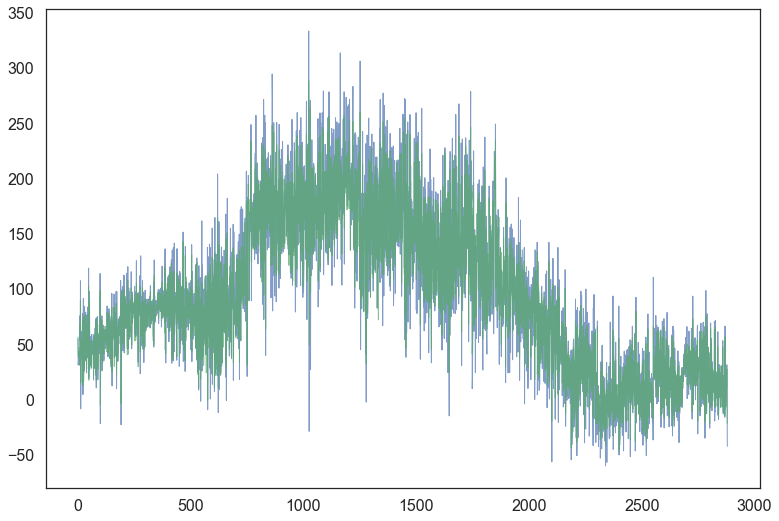

In [107]:
tree = RandomForestRegressor(n_estimators=24, max_depth=25).fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy(y_test, y_pred)

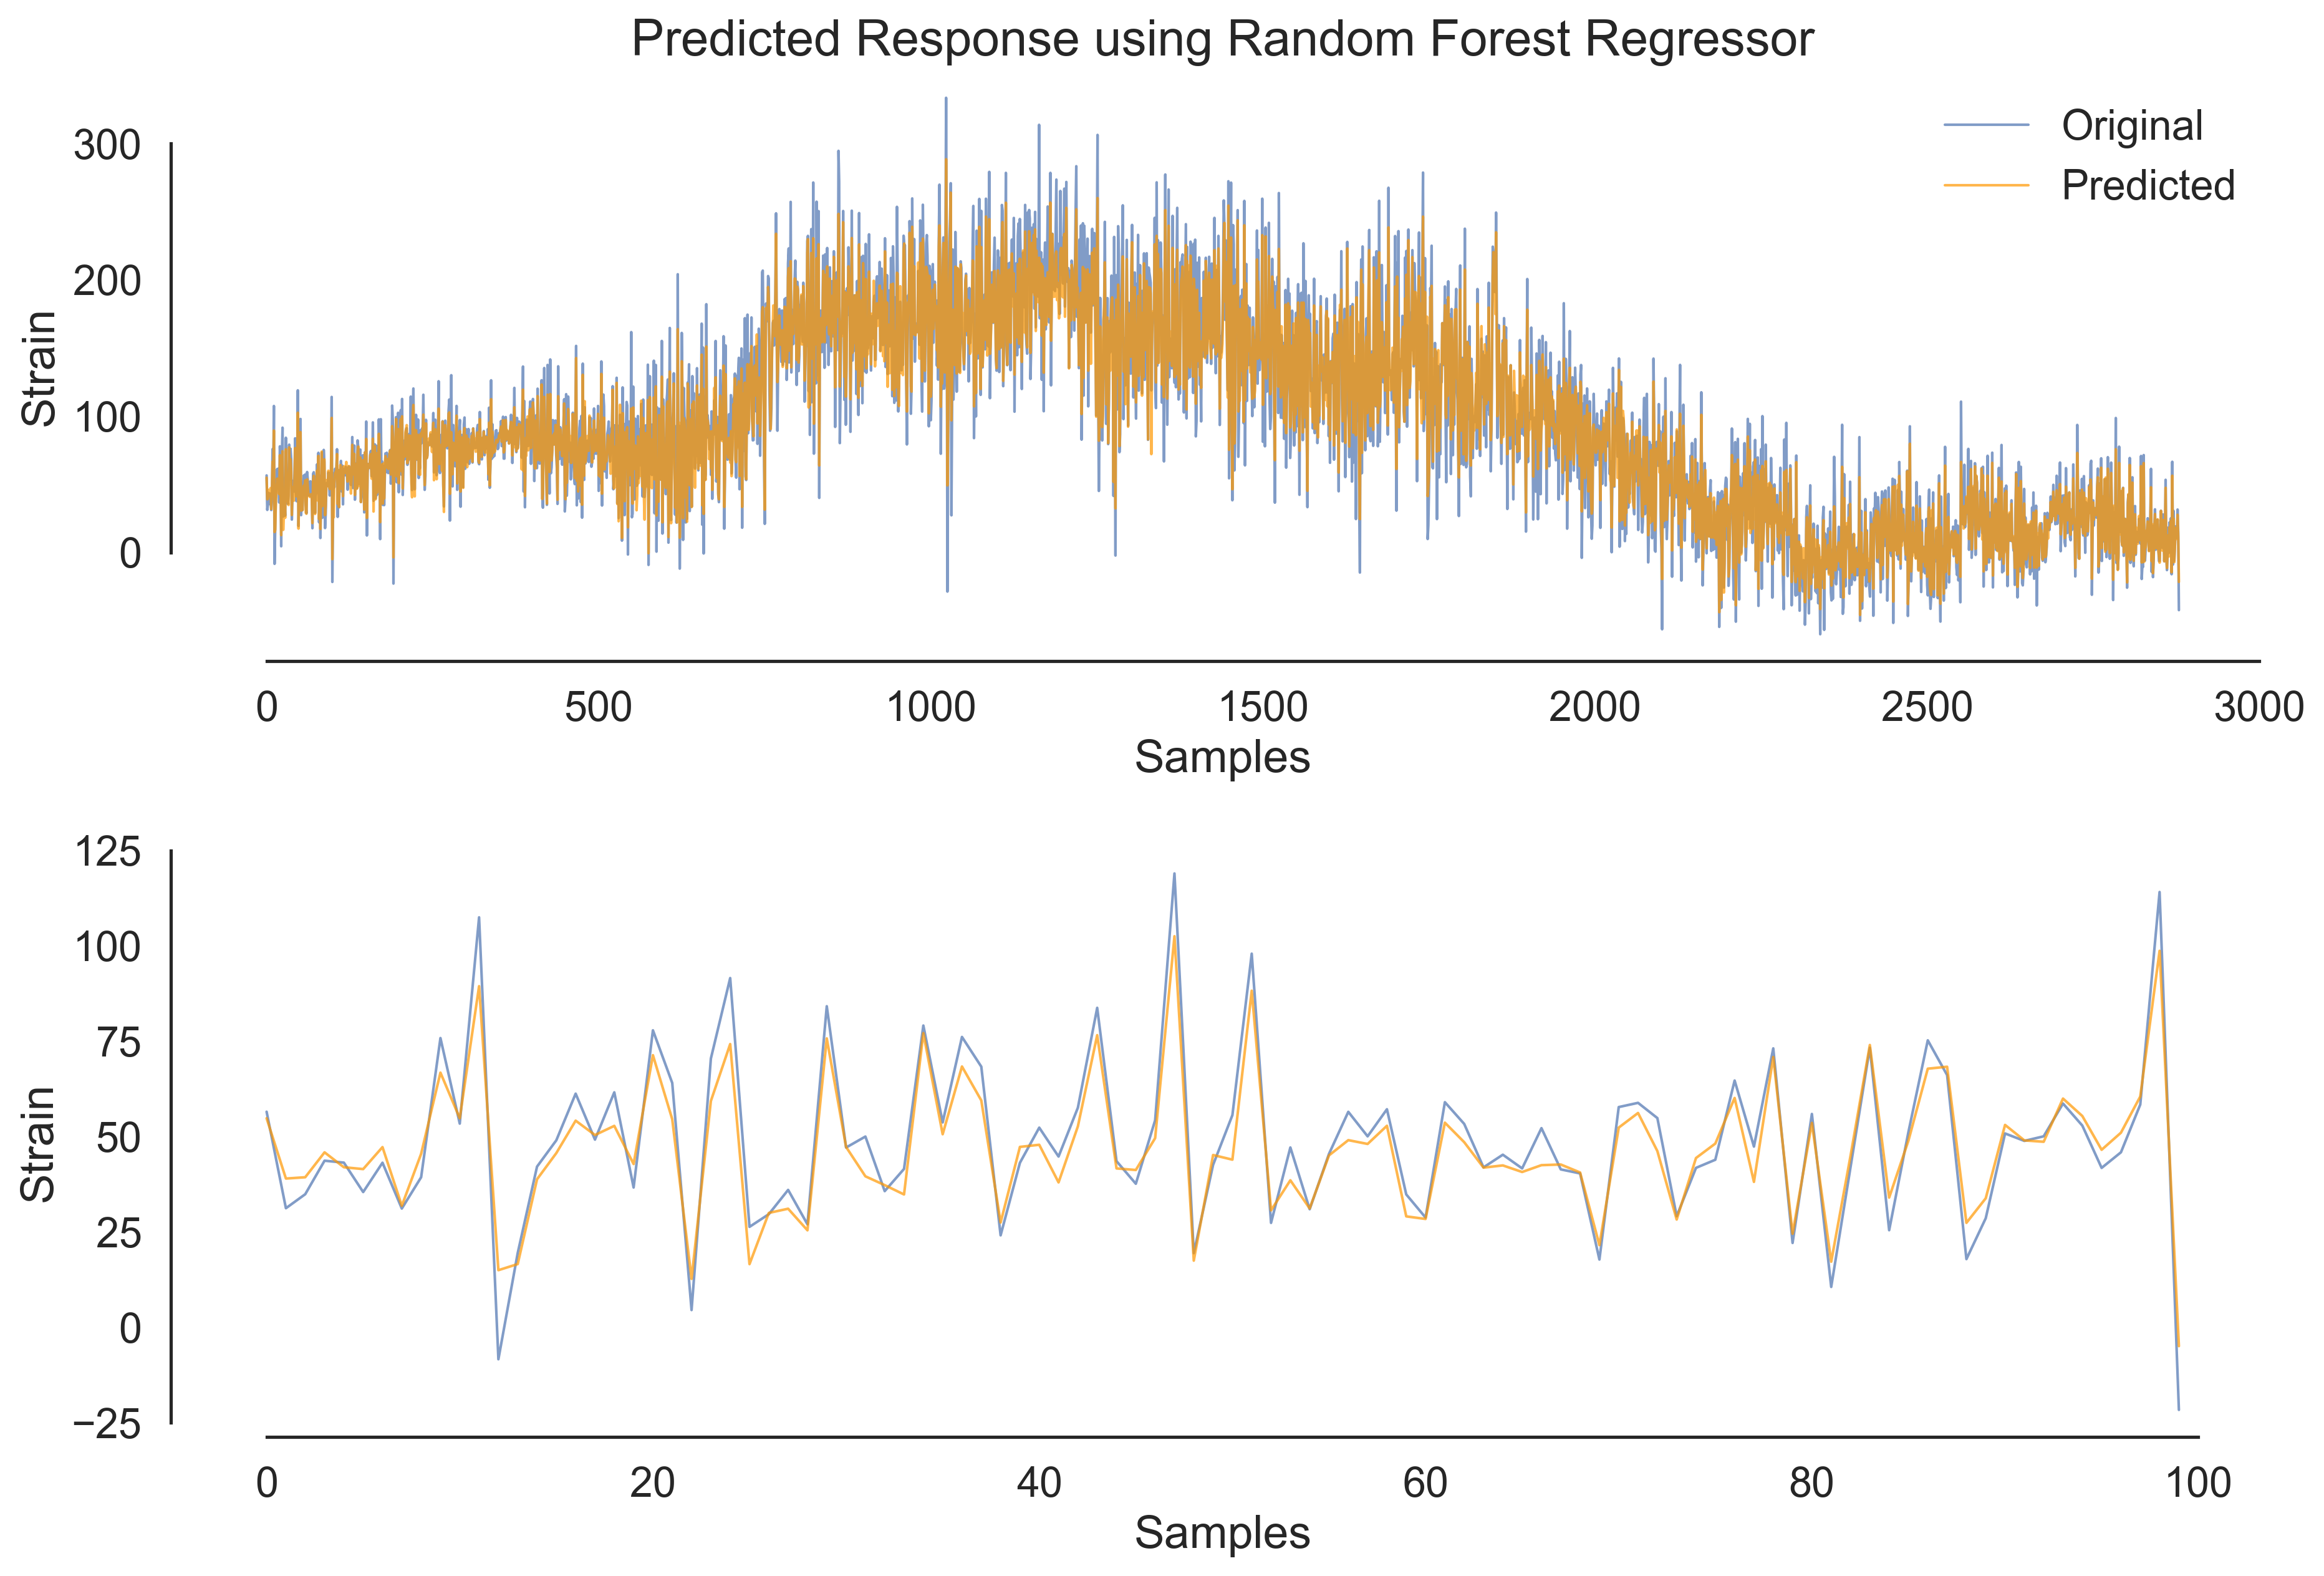

In [129]:
# fig, ax = plt.subplots(1, dpi=300)
plt.figure(dpi=300)
plt.subplot(211)

plt.plot(y_test, linewidth=1, alpha=0.7, label='Original')
plt.plot(y_pred, linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.title('Predicted Response using Random Forest Regressor')
plt.xlabel('Samples')
plt.ylabel('Strain')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()
# plt.savefig('feature-importance.png')

# fig, ax = plt.subplots(1, dpi=300)
plt.subplot(212)

plt.plot(y_test[0:100], linewidth=1, alpha=0.7, label='Original')
plt.plot(y_pred[0:100], linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

# plt.title('Predicted Response using Random Forest Regressor')
plt.xlabel('Samples')
plt.ylabel('Strain')
# plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

plt.savefig('fillna-rf.png')

## Production

In [156]:
tree = RandomForestRegressor().fit(X, y)

z = d.str_134.values[15000:35000]
z2 = tree.predict(d.drop('str_134', axis=1).iloc[15000:35000])

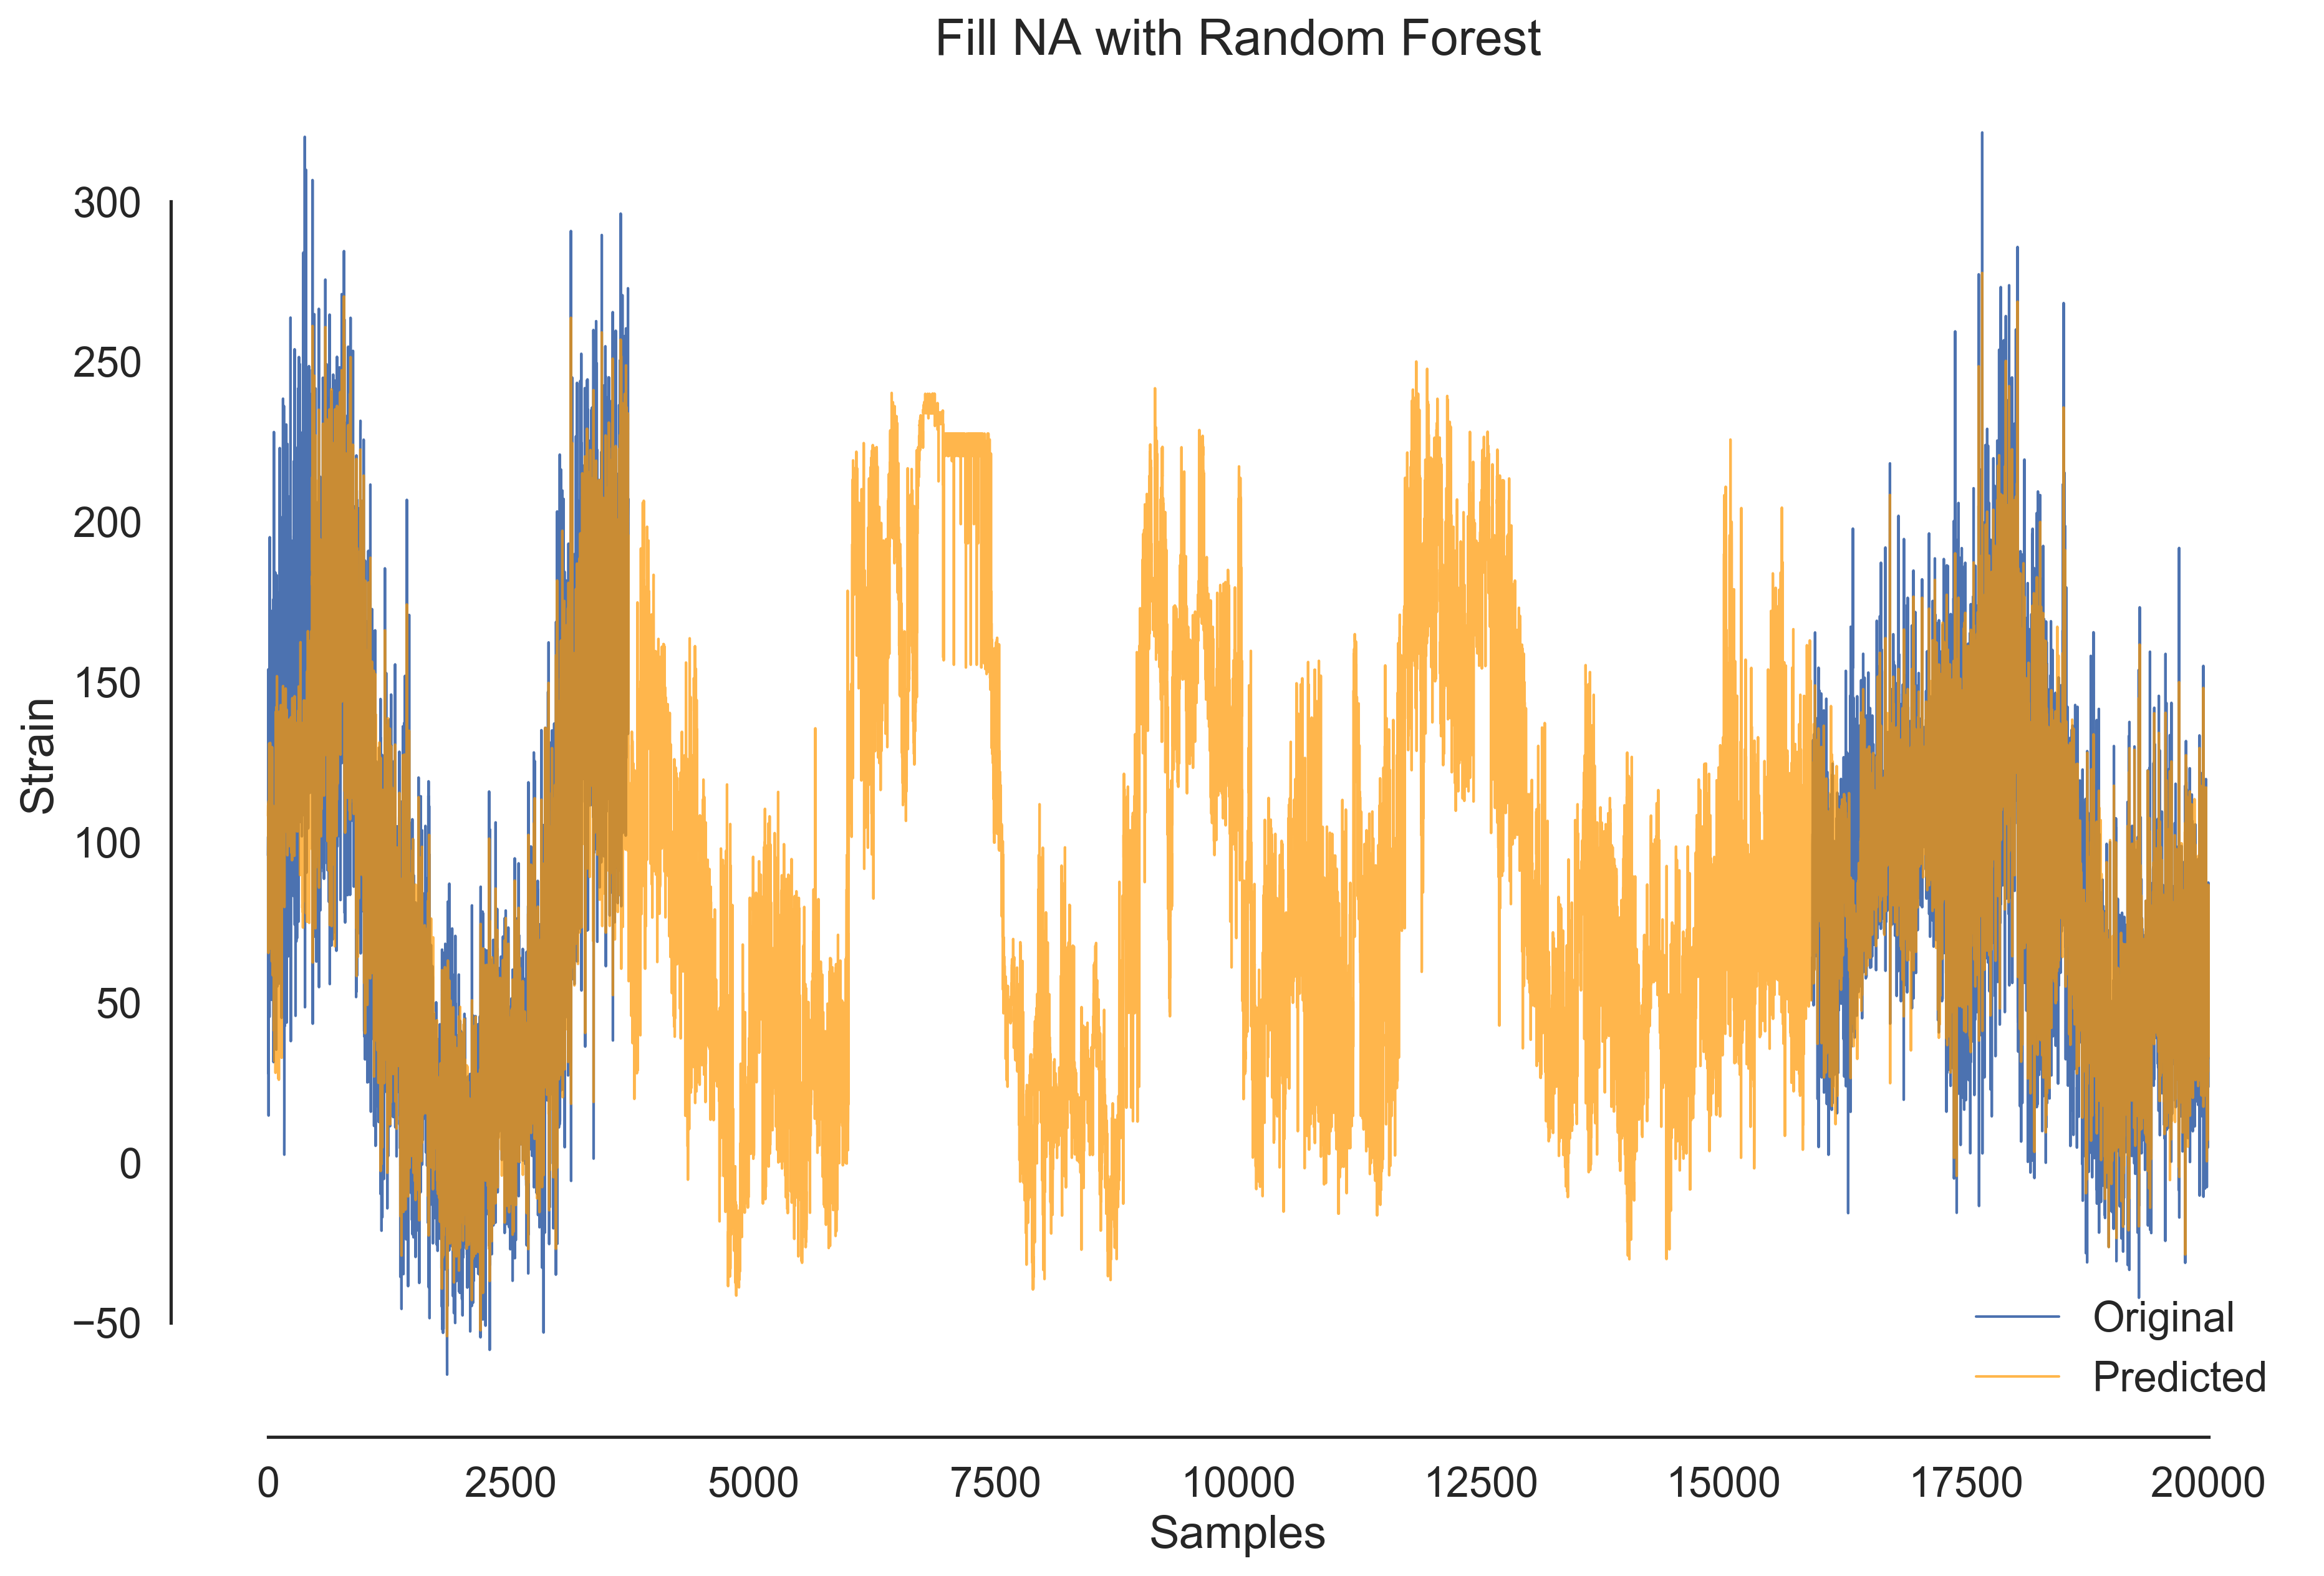

In [164]:
plt.figure(dpi=300)

plt.plot(z, linewidth=1, label='Original')
plt.plot(z2, linewidth=1, alpha=0.7, color=c_orange, label='Predicted')

plt.title('Fill NA with Random Forest')
plt.xlabel('Samples')
plt.ylabel('Strain')
plt.legend(loc=4)
sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig('fillna-rf-final.png')

## Try ANN

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(d.dropna())
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = d.columns
scaled_df.head()

,str_134,disp_204,tmp_215,trf_count,str_166,tmp_269
0,-1.689713,0.087411,0.727125,-1.119518,-1.042857,0.404047
1,-1.859964,0.129661,0.725873,-1.280942,-0.652628,0.404612
2,-0.559249,-0.066063,0.726966,-0.689054,-0.190105,0.404811
3,-0.944996,0.011981,0.725901,-1.119518,-0.309595,0.403798
4,-1.169328,0.031733,0.724404,-0.958094,-0.299517,0.402860


In [122]:
from sklearn.neural_network import MLPRegressor

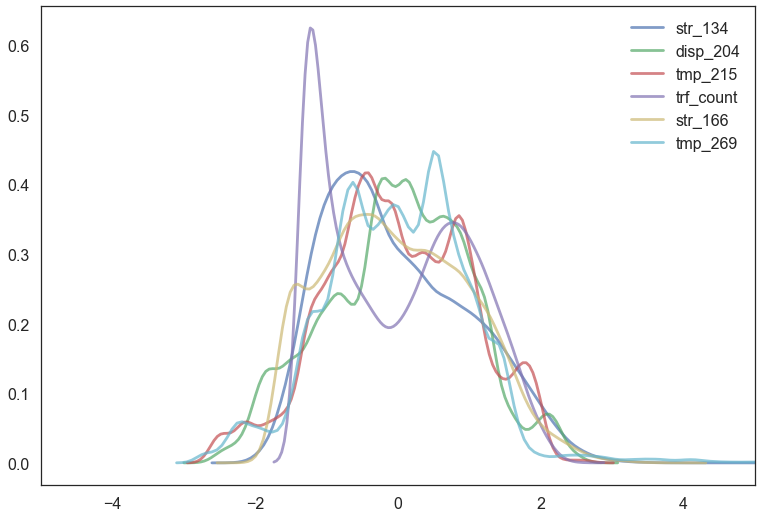

In [123]:
for col in scaled_df.columns:
    sns.kdeplot(scaled_df[col], alpha=0.7)
    plt.xlim((-5, 5))

MSE 2812.6986
R2 0.4765


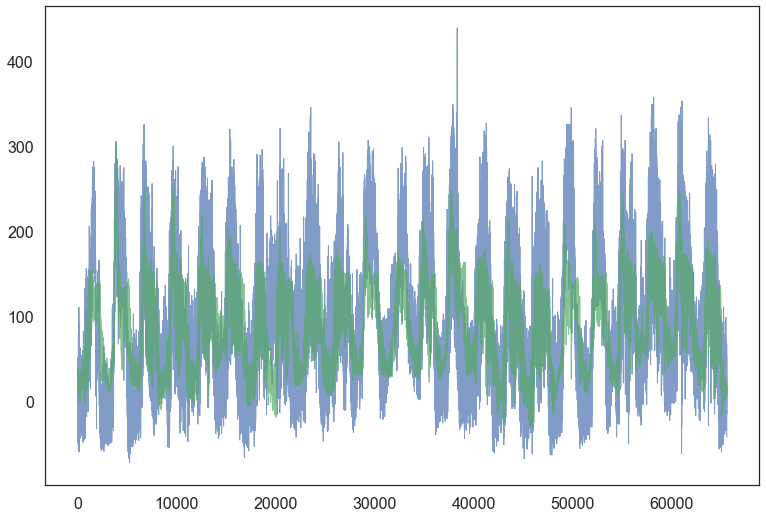

In [132]:
ANN = MLPRegressor().fit(X.values, y.values)
y_pred = ANN.predict(X.values)
accuracy(y.values, y_pred)

bad

Try remove the cycle in the series

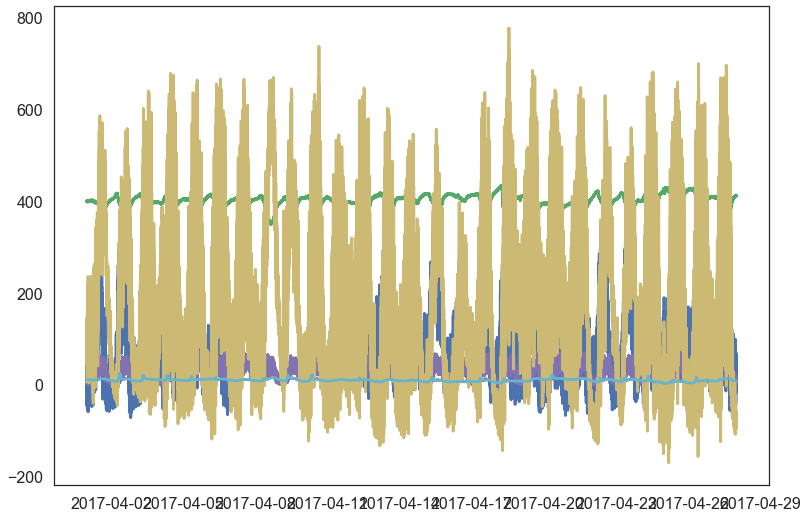

In [134]:
plt.plot(d)

In [140]:
d.corr()

,str_134,disp_204,tmp_215,trf_count,str_166,tmp_269
str_134,1.000000,-0.296848,0.046200,0.502531,0.489474,0.243546
disp_204,-0.296848,1.000000,-0.935640,-0.564301,-0.752138,-0.789869
tmp_215,0.046200,-0.935640,1.000000,0.415332,0.623120,0.776974
trf_count,0.502531,-0.564301,0.415332,1.000000,0.644436,0.433557
str_166,0.489474,-0.752138,0.623120,0.644436,1.000000,0.565032
tmp_269,0.243546,-0.789869,0.776974,0.433557,0.565032,1.000000


,str_134,disp_204,tmp_215,trf_count,str_166,tmp_269
str_134,1.000000,-0.392263,0.089514,0.030307,0.173725,0.100959
disp_204,-0.392263,1.000000,-0.621029,-0.081955,-0.265962,-0.289372
tmp_215,0.089514,-0.621029,1.000000,0.068982,0.128098,0.216819
trf_count,0.030307,-0.081955,0.068982,1.000000,0.023357,0.053155
str_166,0.173725,-0.265962,0.128098,0.023357,1.000000,0.068061
tmp_269,0.100959,-0.289372,0.216819,0.053155,0.068061,1.000000


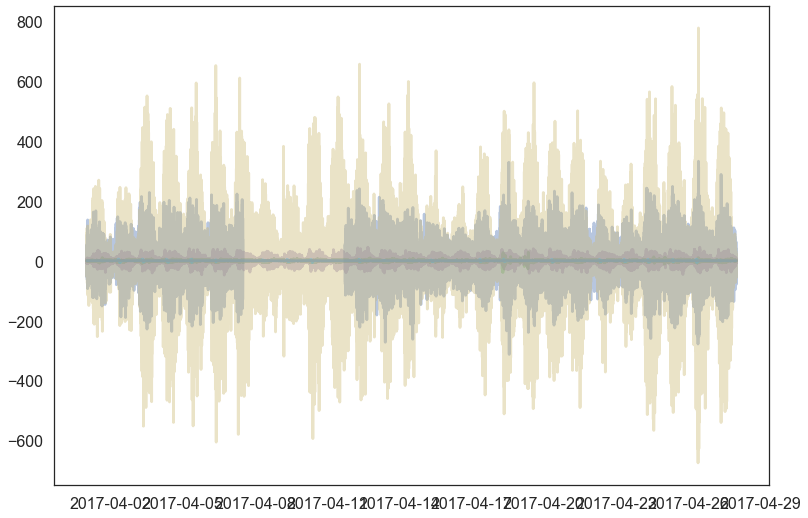

In [143]:
plt.plot(d.diff(48), alpha=0.4)
d.diff(48).corr()

Decompose everything and make a linear model